**IDA #1: Data Collection and Importation**

In [1]:
#1 IDA: Data Collection and Importation

#loading data into the data frame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#import openpyxl

In [2]:
#importing turbidity measurements 
turb = pd.read_excel('physiochemical data.xlsx', sheet_name='Master Physiochem', usecols=['Turbidity (NTU)'])
#checking that data was correctly imported
turb.head()

#importing total suspended solids measurements 
tss = pd.read_excel('physiochemical data.xlsx', sheet_name='TSS', usecols=['TSS (% w/v)'])

#importing total solids measurements 
ts = pd.read_excel('physiochemical data.xlsx', sheet_name='TS', usecols=['%TS (w/w)'])


In [43]:
#1 cont. importing spectral data
#importing wavelengths 
wavelengths = pd.read_excel('SAMPLE SET 1.xlsx', sheet_name='SAMPLE SET 1', nrows=1, header = None)
#column one does not have a value, dropping this column
wavelengths = wavelengths.drop(columns=wavelengths.columns[0])
#dropping the last two columns which are strings, not floats
wavelengths = wavelengths.drop(columns=wavelengths.columns[125:])
#extracting values so I can plot
wavelengths = wavelengths.iloc[0].values
#checking that data was correctly imported
#print(wavelengths)

#I think this could be a for loop for all three data types
#we could put a for loop here for all sets of samples
#importing absorbances and wavelengths of treated water (tw)
tw = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='SAMPLE SET 2', skiprows = range(1,109), header = None)
#dropping first column with sample names -might undo this later
tw = tw.drop(columns=tw.columns[0])
#dropping last two columns which are non numeric
tw = tw.drop(columns=tw.columns[125:])
#extracting individual samples
#A1 triplicate value average, averaging three rows element-wise
A1 = tw.iloc[[1, 3]].mean(axis=0)
B1 = tw.iloc[[4, 6]].mean(axis=0)
C1 = tw.iloc[[7, 9]].mean(axis=0)
D1 = tw.iloc[[10, 12]].mean(axis=0)
E1= tw.iloc[[13, 15]].mean(axis=0)
F1 = tw.iloc[[16, 18]].mean(axis=0)
G1 = tw.iloc[[19, 21]].mean(axis=0)
H1 = tw.iloc[[22, 24]].mean(axis=0)
I1 = tw.iloc[[25, 27]].mean(axis=0)
J1 = tw.iloc[[28, 30]].mean(axis=0)
K1 = tw.iloc[[31, 33]].mean(axis=0)
L1 = tw.iloc[[34, 36]].mean(axis=0)

#extracting blank readings (no contamination, clean water)
blank = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='BLANK', skiprows = 1, header = None)
#dropping first column with sample nams -might undo this later
blank = blank.drop(columns=blank.columns[0])
#dropping last two columns which are non numeric
blank = blank.drop(columns=blank.columns[125:])

blnk1 = blank.iloc[0].values
blnk2 = blank.iloc[1].values
blnk3 = blank.iloc[2].values

#extracting blackwater readings (contaminated water without any treatment)
bw = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='BW SAMPLES', skiprows = 1, header = None)
#dropping first column with sample names -might undo this later
bw = bw.drop(columns=bw.columns[0])
#dropping last two columns which are non numeric
bw = bw.drop(columns=bw.columns[125:])


bw1 = bw.iloc[[1, 3]].mean(axis=0)
bw2 = bw.iloc[[4, 6]].mean(axis=0)
bw3 = bw.iloc[[7, 9]].mean(axis=0)
bw4 = bw.iloc[[10, 12]].mean(axis=0)
bw5 = bw.iloc[[13, 15]].mean(axis=0)
bw6 = bw.iloc[[16, 18]].mean(axis=0)
bw7 = bw.iloc[[19, 21]].mean(axis=0)
bw8= bw.iloc[[22, 24]].mean(axis=0)


**IDA #6 Missing Data Analysis**

<Axes: >

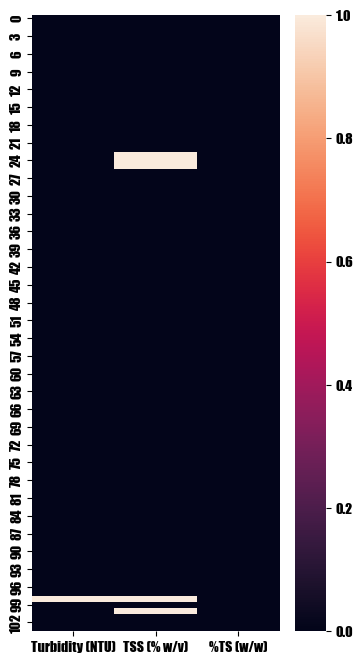

In [12]:
#IDA 6. handling missing values
merged_turbtssts = pd.concat([turb, tss,ts], axis=1)
plt.figure(figsize=(4,8))
# sns.heatmap(df.isna().transpose(), cmap="plasma")
# sns.heatmap(df.isna(), cmap="viridis")
sns.heatmap(merged_turbtssts.isna(), cmap="rocket")

**KNN: TSS Imputation**

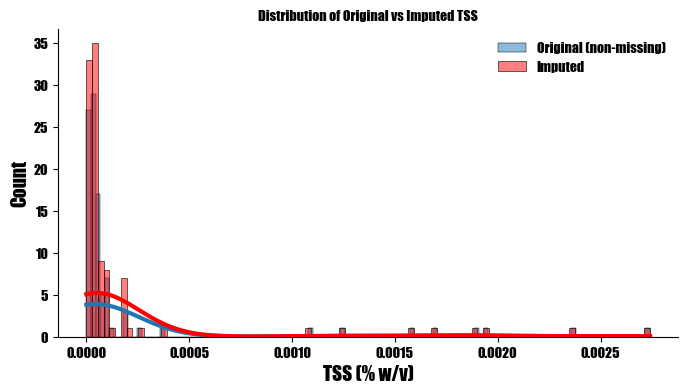

In [13]:
#From Week06 In class assignment CMSE830- KNN nearest neighbors
#missing and not missing
tss_missing = tss[tss.isnull().any(axis=1)]
tss_not_missing = tss.dropna()

#preparing scalar for KNN
scaler = StandardScaler()
tss_scaled = pd.DataFrame(scaler.fit_transform(tss_not_missing), columns = tss_not_missing.columns)

#intialize and fit KNN imputer
imputer = KNNImputer(n_neighbors=5, weights ='distance')
#here we have to make the scatter plot of the data without missing values so they aren't skewed by missing values, then we overlay the missing values 
#on the scatter plot 
#what does .fit do? Training on non-missing data ---it's machine learning and has never seen this data set before, so it has to train
imputer.fit(tss_scaled)

# function to impute and inverse transform the data
def impute_and_inverse_transform(data):
    # Ensure 'data' is always a DataFrame with proper column names
    scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
    imputed_scaled = imputer.transform(scaled_data)
    return pd.DataFrame(scaler.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

# impute missing values
tss_imputed = impute_and_inverse_transform(tss)

# compare original and imputed data for tss
fig = plt.figure(figsize=(8, 4))
sns.histplot(tss_not_missing.dropna(), kde=True, color='blue', alpha=0.5, label='Original (non-missing)')
#sns.histplot(tss_imputed.loc[tss['TSS (% w/v)'].isnull(), 'TSS (% w/v)'], kde=True, color='red', alpha=0.5, label='Imputed')
sns.histplot(tss_imputed['TSS (% w/v)'], kde=True, color='red', alpha=0.5, label='Imputed')
plt.title('Distribution of Original vs Imputed TSS')
plt.legend()
plt.show()


**KNN: Turbidity Imputation**

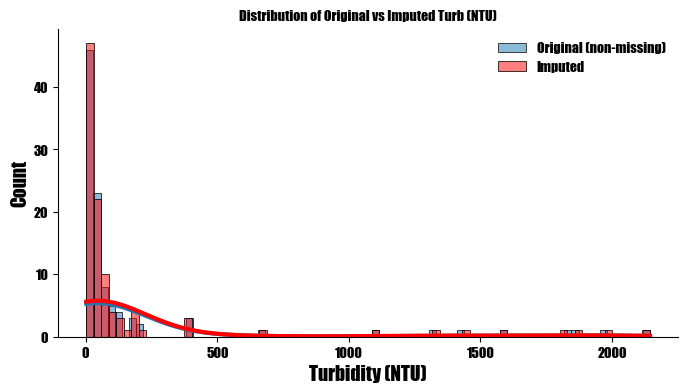

In [14]:
#From Week06 In class assignment CMSE830
#missing and not missing
turb_missing = turb[turb.isnull().any(axis=1)]
turb_not_missing = turb.dropna()

#preparing scalar for KNN
scaler = StandardScaler()
turb_scaled = pd.DataFrame(scaler.fit_transform(turb_not_missing), columns = turb_not_missing.columns)

#intialize and fit KNN imputer
#imputer = KNNImputer(n_neighbors=5)
#modded above function to include 10 neighbors and weight the imputed value depending on how close the points were-the closer the point the more it 
#affects the imputing value
imputer = KNNImputer(n_neighbors=3, weights ='distance')
#here we have to make the scatter plot of the data without missing values so they aren't skewed by missing values, then we overlay the missing values 
#on the scatter plot 
#what does .fit do? Training on non-missing data ---it's machine learning and has never seen this data set before, so it has to train
imputer.fit(turb_scaled)

# function to impute and inverse transform the data
def impute_and_inverse_transform(data):
    # Ensure 'data' is always a DataFrame with proper column names
    scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
    imputed_scaled = imputer.transform(scaled_data)
    return pd.DataFrame(scaler.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

# impute missing values
turb_imputed = impute_and_inverse_transform(turb)

# compare original and imputed data for tss
fig = plt.figure(figsize=(8, 4))
sns.histplot(turb_not_missing.dropna(), kde=True, color='blue', alpha=0.5, label='Original (non-missing)')
sns.histplot(turb_imputed['Turbidity (NTU)'], kde=True, color='red', alpha=0.5, label='Imputed')
plt.title('Distribution of Original vs Imputed Turb (NTU)')
plt.legend()
plt.show()

**IDA 2:Data Cleaning and Pre-processing**
- All measured parameters (TSS, Turbidity, and TS) need to be split between treated water and blackwater

In [15]:
#tss and turb data was imputed, no data missing for ts

tw_tss = tss_imputed[0:96]
tw_ts = ts[0:96]
tw_turb = turb_imputed[0:96]

bw_tss = tss_imputed[96:106]
bw_ts = ts[96:106]
bw_turb = turb_imputed[96:106]

#merging related data
tw_physio = pd.concat([tw_tss, tw_ts,tw_turb], axis=1)
bw_physio = pd.concat([bw_tss, bw_ts,bw_turb], axis=1)
tw_bw_physio = pd.concat([tw_physio,bw_physio])

**IDA 4: Descriptive Statistics**

In [16]:

st.write("Descriptive Statistics for Treated Water's Physiochemical Parameters")
st.dataframe(tw_physio.describe())

st.write("Descriptive Statistics for Blackwater's Physiochemical Parameters")
st.dataframe(bw_physio.describe())


NameError: name 'st' is not defined

**EDA 4: Correlation Analysis**
- Physiochemical Parameters Only
- **Strong** positive correlation between turbidity, TS, and TSS-this is expected because they are all measurements on particles in a solution

<Axes: >

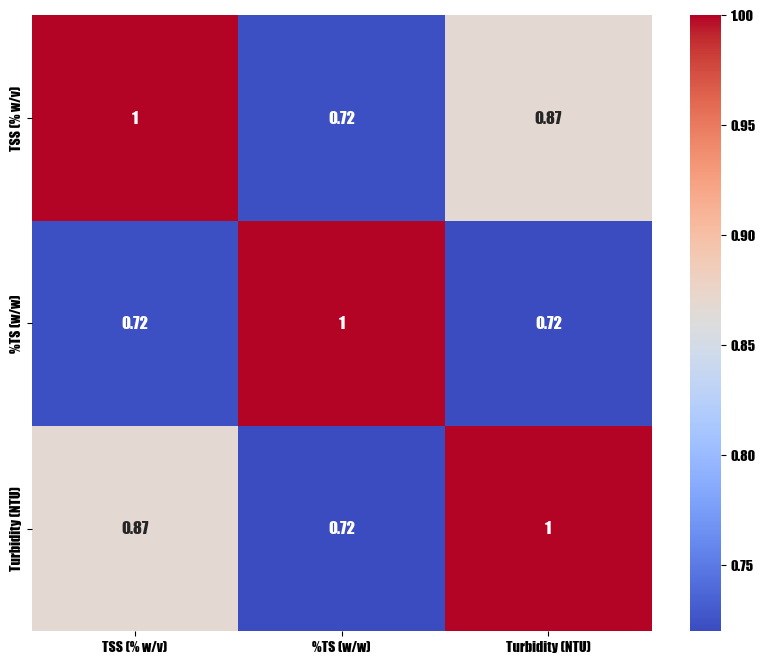

In [18]:
physio_corr = tw_bw_physio.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(physio_corr, annot=True, cmap='coolwarm')

**EDA	6. Pattern and trend identification**	
- Identifying patterns and grouping in the data

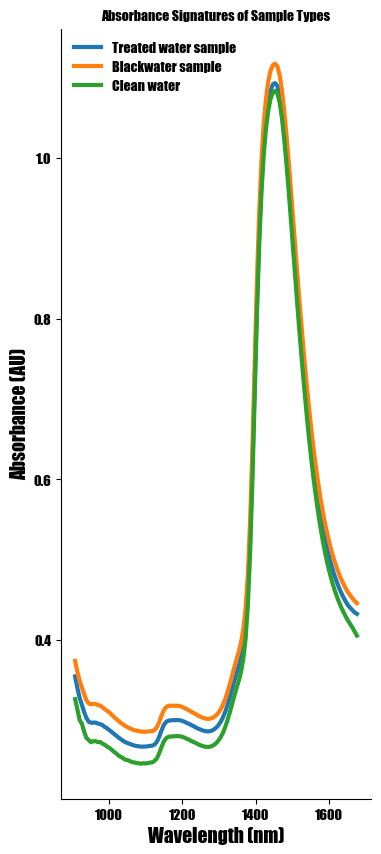

In [19]:
#From HW 2
#EDA	6. Pattern and trend identification	- Look for temporal trends in time series data
# Identify seasonal patterns
# Detect clusters or groupings in the data
# Set custom rcParams: compare this to the codes I gave you for the first ICA
plt.rcParams.update({                     # This is the big difference to the code before, here we customize the setting for all the following subplots
    # Figure
    'figure.figsize': (4, 10),
    'figure.dpi': 100,                    # dpi stand for dots per inch
    # Font
    'font.family': 'fantasy',
    'font.size': 12,
    # Axes
    'axes.titlesize': 10,                 # Setting for axis like title and label
    'axes.labelsize': 14,                   
    'axes.spines.top': False,             # Spines note boundaries of the data area and are disabled here
    'axes.spines.right': False,
    # Ticks
    'xtick.direction': 'out',             # ticks are pointing outwards now for x-axis
    'ytick.direction': 'out',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    # Legend
    'legend.fontsize': 10,
    'legend.frameon': False,
    # Lines
    'lines.linewidth': 3,
    'lines.markersize': 18,
    # Grid
    'grid.linewidth': 0.5,
    'grid.alpha': 0.8,
    # Color cycle
    'axes.prop_cycle': plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                                            # Setting a cycle for colors to be used
})
fig1, ax1 = plt.subplots()
ax1.plot(wavelengths, A1, label='Treated water sample')                       
ax1.plot(wavelengths, bw1, label='Blackwater sample')
ax1.plot(wavelengths, blnk1, label='Clean water')
ax1.set_title('Absorbance Signatures of Sample Types')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Absorbance (AU)')
ax1.legend()


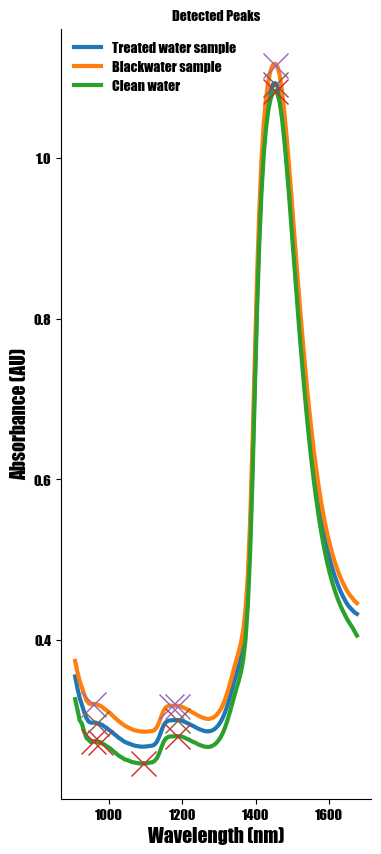

In [20]:
#finding peaks in the data -which may be used in the correlation matrix to try and correlate TSS, Turbidity
from scipy.signal import find_peaks
blnk1_peaks, _ = find_peaks(blnk1)
A1_peaks, _ = find_peaks(A1)
bw1_peaks, _ = find_peaks(bw1)

#plotting spectral signatures
plt.plot(wavelengths, A1, label='Treated water sample')                    
plt.plot(wavelengths, bw1, label='Blackwater sample')
plt.plot(wavelengths, blnk1, label='Clean water')

#marking peaks on signatures based on scipy find_peaks function
plt.plot(wavelengths[blnk1_peaks], blnk1[blnk1_peaks], "x")  
plt.plot(wavelengths[bw1_peaks], bw1[bw1_peaks], "x")
plt.plot(wavelengths[A1_peaks], A1[A1_peaks], "x") 
plt.title("Detected Peaks")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.legend()



[np.int64(88), np.int64(45)]
[ 9 45 88]
[ 8 42 45 88]
[ 8 11 30 45 88]
[np.int64(45), np.int64(88)]


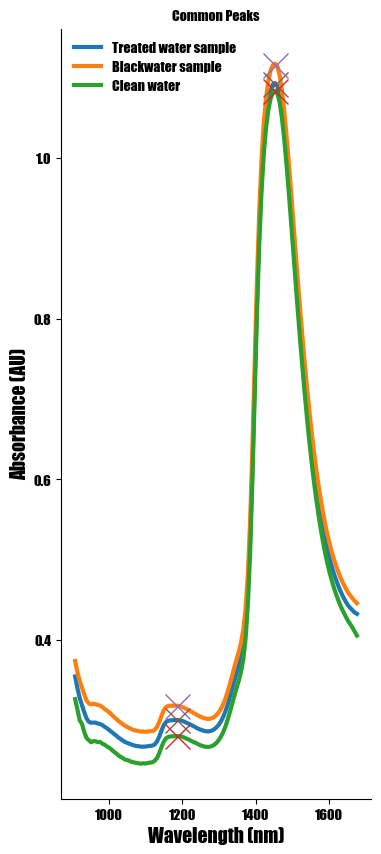

In [21]:
#finding common peak indices
com_peaks = list(set(A1_peaks) & set(bw1_peaks) & set(blnk1_peaks)) 
print(com_peaks)
print(A1_peaks)
print(bw1_peaks)
print(blnk1_peaks)
#finding common peak indices within a tolerance
longest = max([A1_peaks, bw1_peaks, blnk1_peaks], key=len)

tolerance = 2
com_peaks_tol = []

for i, val in enumerate(longest): #not working yet
    # Find nearby indices in A1
    a1_matches = [j for j, v in enumerate(A1_peaks) if v == val and abs(j - i) <= tolerance]
    bw1_matches = [j for j, v in enumerate(bw1_peaks) if v == val and abs(j - i) <= tolerance]
    blnk1_matches = [j for j, v in enumerate(blnk1_peaks) if v == val and abs(j - i) <= tolerance]

    if a1_matches and bw1_matches and blnk1_matches:
        com_peaks_tol.append(val)
print(com_peaks_tol)

#plotting spectral signatures
plt.plot(wavelengths, A1, label='Treated water sample')                    
plt.plot(wavelengths, bw1, label='Blackwater sample')
plt.plot(wavelengths, blnk1, label='Clean water')

#plotting common peaks
plt.plot(wavelengths[com_peaks_tol], blnk1[com_peaks_tol], "x")  
plt.plot(wavelengths[com_peaks_tol], bw1[com_peaks_tol], "x")
plt.plot(wavelengths[com_peaks_tol], A1[com_peaks_tol], "x") 
plt.title("Common Peaks")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.legend()


Finding local minima might also be important in correlating physiochemical parameters to spectra

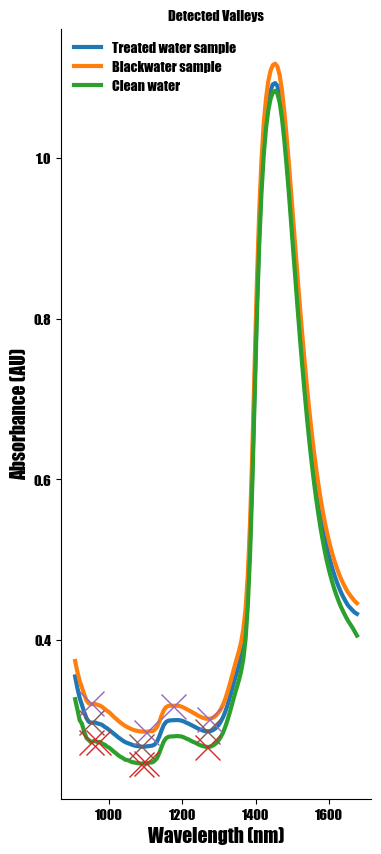

In [22]:
blnk1_valleys, _ = find_peaks(-blnk1)
A1_valleys, _ = find_peaks(-A1)
bw1_valleys, _ = find_peaks(-bw1)

#plotting spectral signatures
plt.plot(wavelengths, A1, label='Treated water sample')                    
plt.plot(wavelengths, bw1, label='Blackwater sample')
plt.plot(wavelengths, blnk1, label='Clean water')

#marking peaks on signatures based on scipy find_peaks function
plt.plot(wavelengths[blnk1_valleys], blnk1[blnk1_valleys], "x")  
plt.plot(wavelengths[bw1_valleys], bw1[bw1_valleys], "x")
plt.plot(wavelengths[A1_valleys], A1[A1_valleys], "x") 
plt.title("Detected Valleys")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.legend()



[np.int64(7)]


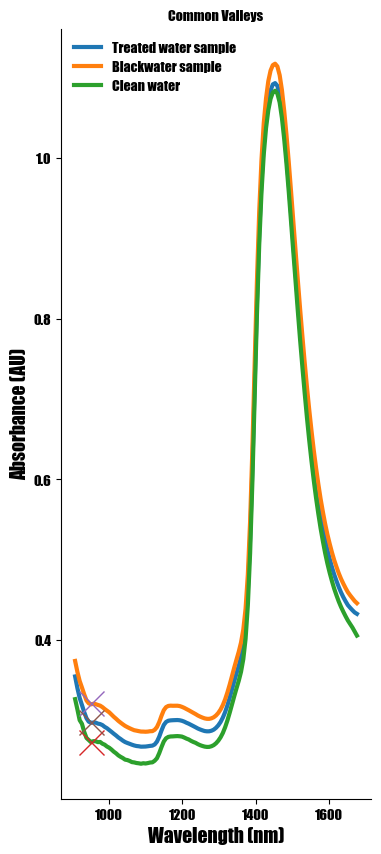

In [23]:
#Finding Common Valleys
#re-initializing lists
a1_matches = []
bw1_matches = []
blnk1_matches =[]

com_valleys = list(set(A1_valleys) & set(bw1_valleys) & set(blnk1_valleys)) 
longest = max([A1_valleys, bw1_valleys, blnk1_valleys], key=len)
tolerance = 10000
com_valleys_tol = []

for i, val in enumerate(longest): #not working yet
    # Find nearby indices in A1
    a1_matches = [j for j, v in enumerate(A1_valleys) if v == val and abs(j - i) <= tolerance]
    bw1_matches = [j for j, v in enumerate(bw1_valleys) if v == val and abs(j - i) <= tolerance]
    blnk1_matches = [j for j, v in enumerate(blnk1_valleys) if v == val and abs(j - i) <= tolerance]

    if a1_matches and bw1_matches and blnk1_matches:
        com_valleys_tol.append(val)
print(com_valleys_tol)

#plotting spectral signatures
plt.plot(wavelengths, A1, label='Treated water sample')                    
plt.plot(wavelengths, bw1, label='Blackwater sample')
plt.plot(wavelengths, blnk1, label='Clean water')

#plotting common peaks
plt.plot(wavelengths[com_valleys_tol], blnk1[com_valleys_tol], "x")  
plt.plot(wavelengths[com_valleys_tol], bw1[com_valleys_tol], "x")
plt.plot(wavelengths[com_valleys_tol], A1[com_valleys_tol], "x") 
plt.title("Common Valleys")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.legend()

**EDA 4: Correlation Analysis**
- extracting values for samples A1-L1 and BW1-BW8 for midsemester project, will do more for the final!
- There is a moderate correlation (0.5 < r < 0.75) between the Absorbance value at wavelength 945.266 nm and TSS, Turbidity, and TS for these samples!

<Axes: >

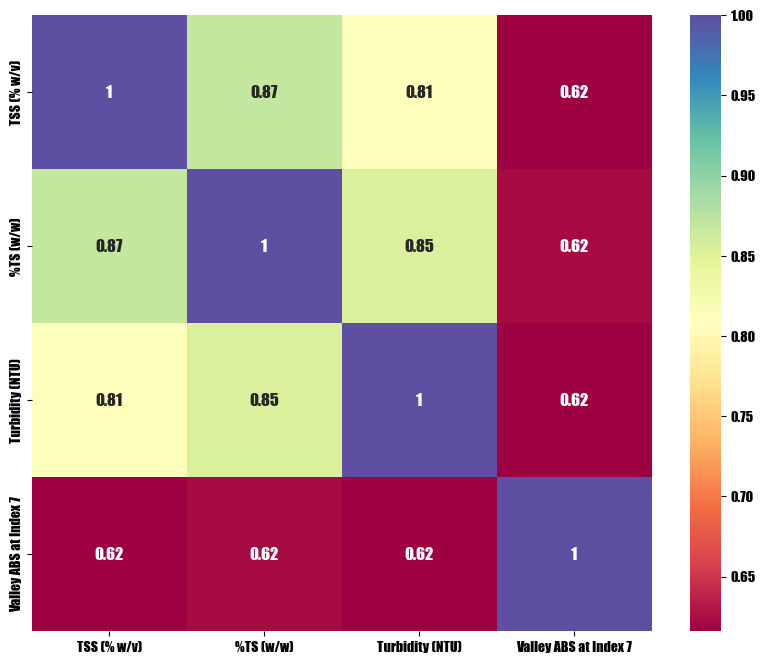

In [63]:
#common indices: 7, 45, 88
#extracting values for samples A1-L1 and BW1-BW8 for midsemester project, will do more for the final
cond_twbw = pd.concat([tw_physio[0:12],bw_physio])
#extracting valley in Samples A1-L1 and BW1-BW8
tw_valley7 = pd.concat([
    pd.Series([A1[7]]), pd.Series([B1[7]]), pd.Series([C1[7]]),
    pd.Series([D1[7]]), pd.Series([E1[7]]), pd.Series([F1[7]]),
    pd.Series([G1[7]]), pd.Series([H1[7]]), pd.Series([I1[7]]),
    pd.Series([J1[7]]), pd.Series([K1[1]]), pd.Series([L1[1]])
], ignore_index=True)

bw_valley7 = pd.concat([
    pd.Series([bw1[7]]), pd.Series([bw2[7]]), pd.Series([bw3[7]]),
    pd.Series([bw4[7]]), pd.Series([bw5[7]]), pd.Series([bw6[7]]),
    pd.Series([bw7[7]]), pd.Series([bw8[7]])
], ignore_index=True)

valley7 = pd.concat([tw_valley7, bw_valley7])

#adding physio and valley data together
cond_twbw = cond_twbw.reset_index(drop=True)
valley7 = valley7.reset_index(drop=True)

cond_data = cond_twbw.copy()
cond_data['Valley ABS at Index 7'] = valley7

cond_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cond_data.corr(), annot=True, cmap='Spectral')

In [25]:
#next steps - mins might also be important, plot those - get tolerance code for finding common peaks working (may be a peak one indice off from the rest)

In [ ]:
#trying streamlit here
!pip install streamlit

In [102]:
%%writefile project.py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import streamlit as st
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks


#importing turbidity measurements 
turb = pd.read_excel('physiochemical data.xlsx', sheet_name='Master Physiochem', usecols=['Turbidity (NTU)'])
#checking that data was correctly imported
turb.head()

#importing total suspended solids measurements 
tss = pd.read_excel('physiochemical data.xlsx', sheet_name='TSS', usecols=['TSS (% w/v)'])

#importing total solids measurements 
ts = pd.read_excel('physiochemical data.xlsx', sheet_name='TS', usecols=['%TS (w/w)'])

#1 cont. importing spectral data
#importing wavelengths 
wavelengths = pd.read_excel('SAMPLE SET 1.xlsx', sheet_name='SAMPLE SET 1', nrows=1, header = None)
#column one does not have a value, dropping this column
wavelengths = wavelengths.drop(columns=wavelengths.columns[0])
#dropping the last two columns which are strings, not floats
wavelengths = wavelengths.drop(columns=wavelengths.columns[125:])
#extracting values so I can plot
wavelengths = wavelengths.iloc[0].values
#checking that data was correctly imported
#print(wavelengths)

#I think this could be a for loop for all three data types
#we could put a for loop here for all sets of samples
#importing absorbances and wavelengths of treated water (tw)
tw = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='SAMPLE SET 2', skiprows = range(1,109), header = None)
#dropping first column with sample names -might undo this later
tw = tw.drop(columns=tw.columns[0])
#dropping last two columns which are non numeric
tw = tw.drop(columns=tw.columns[125:])
#extracting individual samples
#A1 triplicate value average, averaging three rows element-wise
A1 = tw.iloc[[1, 3]].mean(axis=0)
B1 = tw.iloc[[4, 6]].mean(axis=0)
C1 = tw.iloc[[7, 9]].mean(axis=0)
D1 = tw.iloc[[10, 12]].mean(axis=0)
E1= tw.iloc[[13, 15]].mean(axis=0)
F1 = tw.iloc[[16, 18]].mean(axis=0)
G1 = tw.iloc[[19, 21]].mean(axis=0)
H1 = tw.iloc[[22, 24]].mean(axis=0)
I1 = tw.iloc[[25, 27]].mean(axis=0)
J1 = tw.iloc[[28, 30]].mean(axis=0)
K1 = tw.iloc[[31, 33]].mean(axis=0)
L1 = tw.iloc[[34, 36]].mean(axis=0)

#extracting blank readings (no contamination, clean water)
blank = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='BLANK', skiprows = 1, header = None)
#dropping first column with sample nams -might undo this later
blank = blank.drop(columns=blank.columns[0])
#dropping last two columns which are non numeric
blank = blank.drop(columns=blank.columns[125:])

blnk1 = blank.iloc[0].values
blnk2 = blank.iloc[1].values
blnk3 = blank.iloc[2].values

#extracting blackwater readings (contaminated water without any treatment)
bw = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='BW SAMPLES', skiprows = 1, header = None)
#dropping first column with sample names -might undo this later
bw = bw.drop(columns=bw.columns[0])
#dropping last two columns which are non numeric
bw = bw.drop(columns=bw.columns[125:])


bw1 = bw.iloc[[1, 3]].mean(axis=0)
bw2 = bw.iloc[[4, 6]].mean(axis=0)
bw3 = bw.iloc[[7, 9]].mean(axis=0)
bw4 = bw.iloc[[10, 12]].mean(axis=0)
bw5 = bw.iloc[[13, 15]].mean(axis=0)
bw6 = bw.iloc[[16, 18]].mean(axis=0)
bw7 = bw.iloc[[19, 21]].mean(axis=0)
bw8= bw.iloc[[22, 24]].mean(axis=0)


plt.rcParams.update({                     # This is the big difference to the code before, here we customize the setting for all the following subplots
    # Figure
    'figure.figsize': (5, 7),
    'figure.dpi': 20,                    # dpi stand for dots per inch
    # Font
    'font.family': 'fantasy',
    'font.size': 8,
    # Axes
    'axes.titlesize': 10,                 # Setting for axis like title and label
    'axes.labelsize': 14,                   
    'axes.spines.top': False,             # Spines note boundaries of the data area and are disabled here
    'axes.spines.right': False,
    # Ticks
    'xtick.direction': 'out',             # ticks are pointing outwards now for x-axis
    'ytick.direction': 'out',
    'xtick.labelsize': 2,
    'ytick.labelsize': 2,
    # Legend
    'legend.fontsize': 2,
    'legend.frameon': False,
    # Lines
    'lines.linewidth': 1,
    'lines.markersize': 5,
    # Grid
    'grid.linewidth': 0.5,
    'grid.alpha': 0.8,
    # Color cycle
    'axes.prop_cycle': plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                                            # Setting a cycle for colors to be used
})

st.title("💩🦠🧫🧪💧 Wastewater: Using Spectral Signatures to Predict Total Solid Contamination")
st.markdown(
    "<p style='text-align: center; font-size: 1.1em;'>Because sometimes you just need to know...</p>",
    unsafe_allow_html=True
)
st.markdown(
    "<p style='text-align: center; font-size: 1.1em;'>AI Windows Copilot was used to polish app look and adjust tabs from horizontal to vertical</p>",
    unsafe_allow_html=True
)

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy.signal import find_peaks
# Precompute imputed data so it's available in all tabs
tss_missing = tss[tss.isnull().any(axis=1)]
tss_not_missing = tss.dropna()
turb_missing = turb[turb.isnull().any(axis=1)]
turb_not_missing = turb.dropna()

# TSS pipeline
scaler_tss = StandardScaler()
tss_scaled = pd.DataFrame(scaler_tss.fit_transform(tss_not_missing), columns=tss_not_missing.columns)
imputer_tss = KNNImputer(n_neighbors=5, weights='distance')
imputer_tss.fit(tss_scaled)

def impute_and_inverse_transform_tss(data):
    scaled_data = pd.DataFrame(scaler_tss.transform(data), columns=data.columns, index=data.index)
    imputed_scaled = imputer_tss.transform(scaled_data)
    return pd.DataFrame(scaler_tss.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

tss_imputed = impute_and_inverse_transform_tss(tss)

# Turbidity pipeline
scaler_turb = StandardScaler()
turb_scaled = pd.DataFrame(scaler_turb.fit_transform(turb_not_missing), columns=turb_not_missing.columns)
imputer_turb = KNNImputer(n_neighbors=3, weights='distance')
imputer_turb.fit(turb_scaled)

def impute_and_inverse_transform_turb(data):
    scaled_data = pd.DataFrame(scaler_turb.transform(data), columns=data.columns, index=data.index)
    imputed_scaled = imputer_turb.transform(scaled_data)
    return pd.DataFrame(scaler_turb.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

turb_imputed = impute_and_inverse_transform_turb(turb)


# --- Vertical tab selector ---
selected_tab = st.radio("📂 Navigation", [
    "🧠 Introduction",
    "🔍 IDA #6 Missing Data Analysis",
    "🏠 KNN Imputation",
    "📊 Spectral Signatures and Peak Detection",
    "📈 Correlations"
])

# --- Tab 1: Introduction ---
if selected_tab == "🧠 Introduction":
    st.header("Introduction")
    st.write("This tab contains an overview of the project, its importance and goals")
    st.markdown("""
    - 🔬 Step 1: Scientific Question  
    - ❓ Step 2: Why is it important?  
    - 🌈 Step 3: What is NIR?  
    - 🛠️📐 Step 4: What physiochemical parameters are we trying to correlate?  
    """)
    st.write("🔬 Step 1: Scientific Question")
    st.markdown("Can the total amount of solid contamination in a water sample be determined using its near infrared (NIR) spectral signature?")
    st.write("❓ Step 2: Why is it important?")
    st.markdown("Scientists can take water quality measurements in real time! No waiting 24-hours for total solids measurements!")
    st.write("🌈 Step 3: What is NIR?")
    st.markdown("NIR stands for Near-Infrared Spectroscopy, an analytical technique that utilizes the near-infrared region of the electromagnetic spectrum (from 780 nm to 2500 nm) to analyze samples for compositional or characteristic traits.")
    st.markdown("Light in this region interacts with OH, NH and CH bonds and certain wavelengths (frequencies) are associated with each bond type.")
    st.markdown("When NIR light is presented to samples high in chemical compounds containing these bonds, some of energy is absorbed by the sample in these specific wavelengths, and thus the reflected light has less intensity in these regions.")
    st.write("🛠️📐 Step 4: What physiochemical parameters are we trying to correlate?")
    st.markdown("I am trying to correlate total solids (total solids in a sample), total suspended solids (total solids minus dissolved solids), and turbidity of a sample (measured in NTU)")

# --- Tab 2: Missing Data Analysis ---
elif selected_tab == "🔍 IDA #6 Missing Data Analysis":
    st.header("IDA #6 Missing Data Analysis")
    merged_turbtssts = pd.concat([turb, tss, ts], axis=1)
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(merged_turbtssts.isna(), cmap="rocket", cbar=True, ax=ax)
    ax.set_title("Missing Data Heatmap", fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=2)
    st.pyplot(fig)

# --- Tab 3: KNN Imputation ---
elif selected_tab == "🏠 KNN Imputation":
    st.header("KNN Imputation")
    st.write("Assuming MCAR—because any missing values are because I dropped the sample 😬, but I will actually prove it the way we did in class")

    tss_missing = tss[tss.isnull().any(axis=1)]
    tss_not_missing = tss.dropna()
    turb_missing = turb[turb.isnull().any(axis=1)]
    turb_not_missing = turb.dropna()

    scaler_tss = StandardScaler()
    tss_scaled = pd.DataFrame(scaler_tss.fit_transform(tss_not_missing), columns=tss_not_missing.columns)
    imputer_tss = KNNImputer(n_neighbors=5, weights='distance')
    imputer_tss.fit(tss_scaled)

    def impute_and_inverse_transform_tss(data):
        scaled_data = pd.DataFrame(scaler_tss.transform(data), columns=data.columns, index=data.index)
        imputed_scaled = imputer_tss.transform(scaled_data)
        return pd.DataFrame(scaler_tss.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

    tss_imputed = impute_and_inverse_transform_tss(tss)

    scaler_turb = StandardScaler()
    turb_scaled = pd.DataFrame(scaler_turb.fit_transform(turb_not_missing), columns=turb_not_missing.columns)
    imputer_turb = KNNImputer(n_neighbors=3, weights='distance')
    imputer_turb.fit(turb_scaled)

    def impute_and_inverse_transform_turb(data):
        scaled_data = pd.DataFrame(scaler_turb.transform(data), columns=data.columns, index=data.index)
        imputed_scaled = imputer_turb.transform(scaled_data)
        return pd.DataFrame(scaler_turb.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

    turb_imputed = impute_and_inverse_transform_turb(turb)

    fig1 = plt.figure(figsize=(8, 4))
    sns.histplot(tss_not_missing.dropna(), kde=True, color='blue', alpha=0.5, label='Original (non-missing)')
    sns.histplot(tss_imputed['TSS (% w/v)'], kde=True, color='red', alpha=0.5, label='Imputed')
    plt.title('Distribution of Original vs Imputed TSS')
    plt.legend(fontsize=10)
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.tight_layout()
    st.pyplot(fig1)

    fig2 = plt.figure(figsize=(8, 4))
    sns.histplot(turb_not_missing.dropna(), kde=True, color='blue', alpha=0.5, label='Original (non-missing)')
    sns.histplot(turb_imputed['Turbidity (NTU)'], kde=True, color='red', alpha=0.5, label='Imputed')
    plt.title('Distribution of Original vs Imputed Turbidity')
    plt.legend(fontsize=10)
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.tight_layout()
    st.pyplot(fig2)

# --- Tab 4: Spectral Signatures and Peak Detection ---
elif selected_tab == "📊 Spectral Signatures and Peak Detection":
    st.header("📊 Spectral Signature Analysis")

    plt.rcParams.update({
        'figure.figsize': (4, 10),
        'figure.dpi': 100,
        'font.family': 'fantasy',
        'font.size': 12,
        'axes.titlesize': 10,
        'axes.labelsize': 14,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'xtick.direction': 'out',
        'ytick.direction': 'out',
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'legend.frameon': False,
        'lines.linewidth': 3,
        'lines.markersize': 18,
        'grid.linewidth': 0.5,
        'grid.alpha': 0.8,
        'axes.prop_cycle': plt.cycler(color=[
            '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
            '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
            '#bcbd22', '#17becf'
        ]),
    })

    fig1, ax1 = plt.subplots()
    ax1.plot(wavelengths, A1, label='Treated water sample')
    ax1.plot(wavelengths, bw1, label='Blackwater sample')
    ax1.plot(wavelengths, blnk1, label='Clean water')
    ax1.set_title('Absorbance Signatures of Sample Types')
    ax1.set_xlabel('Wavelength (nm)')
    ax1.set_ylabel('Absorbance (AU)')
    ax1.legend()
    st.pyplot(fig1)

    blnk1_peaks, _ = find_peaks(blnk1)
    A1_peaks, _ = find_peaks(A1)
    bw1_peaks, _ = find_peaks(bw1)

    fig2, ax2 = plt.subplots()
    ax2.plot(wavelengths, A1, label='Treated water sample')
    ax2.plot(wavelengths, bw1, label='Blackwater sample')
    ax2.plot(wavelengths, blnk1, label='Clean water')
    ax2.plot(wavelengths[blnk1_peaks], blnk1[blnk1_peaks], "x", label='Clean water peaks')
    ax2.plot(wavelengths[bw1_peaks], bw1[bw1_peaks], "x", label='Blackwater peaks')
    ax2.plot(wavelengths[A1_peaks], A1[A1_peaks], "x", label='Treated water peaks')
    ax2.set_title("Detected Peaks")
    ax2.set_xlabel("Wavelength (nm)")
    ax2.set_ylabel("Absorbance (AU)")
    ax2.legend()
    st.pyplot(fig2)

    # --- Find Common Peaks Within Tolerance ---
    tolerance = 2
    com_peaks_tol = []
    for val in A1_peaks:
        if any(abs(val - p) <= tolerance for p in bw1_peaks) and any(abs(val - p) <= tolerance for p in blnk1_peaks):
            com_peaks_tol.append(val)

    # --- Figure 3: Common Peaks ---
    fig3, ax3 = plt.subplots()
    ax3.plot(wavelengths, A1, label='Treated water sample')
    ax3.plot(wavelengths, bw1, label='Blackwater sample')
    ax3.plot(wavelengths, blnk1, label='Clean water')
    ax3.plot(wavelengths[com_peaks_tol], A1[com_peaks_tol], "x", label='Common peaks (Treated)')
    ax3.plot(wavelengths[com_peaks_tol], bw1[com_peaks_tol], "x", label='Common peaks (Blackwater)')
    ax3.plot(wavelengths[com_peaks_tol], blnk1[com_peaks_tol], "x", label='Common peaks (Clean)')
    ax3.set_title("Common Peaks Across All Samples")
    ax3.set_xlabel("Wavelength (nm)")
    ax3.set_ylabel("Absorbance (AU)")
    ax3.legend()
    st.pyplot(fig3)

elif selected_tab == "📈 Correlations":
    st.header("Correlations")
    #tss and turb data was imputed, no data missing for ts

    tw_tss = tss_imputed[0:96]
    tw_ts = ts[0:96]
    tw_turb = turb_imputed[0:96]

    bw_tss = tss_imputed[96:106]
    bw_ts = ts[96:106]
    bw_turb = turb_imputed[96:106]

    #merging related data
    tw_physio = pd.concat([tw_tss, tw_ts,tw_turb], axis=1)
    bw_physio = pd.concat([bw_tss, bw_ts,bw_turb], axis=1)
    tw_bw_physio = pd.concat([tw_physio,bw_physio])
    st.write("Descriptive Statistics for Treated Water's Physiochemical Parameters")
    st.dataframe(tw_physio.describe())

    st.write("Descriptive Statistics for Blackwater's Physiochemical Parameters")
    st.dataframe(bw_physio.describe())
    
   # Set global context for consistent styling
    sns.set_context("notebook", font_scale=1.2)  # Slightly scaled for annotations

    # --- General correlation matrix ---
    merged_data = pd.concat([tss, turb, ts], axis=1)
    corr = merged_data.corr()
    st.write("Here is a correlation matrix analyzing the different physiochemical parameters. As expected, there is a strong positive correlation between turbidity, TS, and TSS-they are all measurements on particles in a solution ")
    fig1, ax1 = plt.subplots(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax1, annot_kws={"size": 12})
    ax1.set_title("Correlation Matrix: TSS, Turbidity, TS", fontsize=16)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)
    st.pyplot(fig1)


    # --- Valley absorbance correlation matrix ---
    st.write("Here is a correlation matrix between physiochemical parameters and a common valley (local minimum) between treated water (samples A1-L1) and blackwater (samples BW1-BW8) spectral signatures. This tries to preliminarily answer the question: are these physiochemical variables correlated to spectral signature?")
    st.write("There is a moderate correlation (0.5 < r < 0.75) between the Absorbance value at wavelength 945.266 nm and TSS, Turbidity, and TS for these samples!")
    cond_twbw = pd.concat([tw_physio[0:12], bw_physio])
    tw_valley7 = pd.concat([
        pd.Series([A1[7]]), pd.Series([B1[7]]), pd.Series([C1[7]]),
        pd.Series([D1[7]]), pd.Series([E1[7]]), pd.Series([F1[7]]),
        pd.Series([G1[7]]), pd.Series([H1[7]]), pd.Series([I1[7]]),
        pd.Series([J1[7]]), pd.Series([K1[1]]), pd.Series([L1[1]])
    ], ignore_index=True)

    bw_valley7 = pd.concat([
        pd.Series([bw1[7]]), pd.Series([bw2[7]]), pd.Series([bw3[7]]),
        pd.Series([bw4[7]]), pd.Series([bw5[7]]), pd.Series([bw6[7]]),
        pd.Series([bw7[7]]), pd.Series([bw8[7]])
    ], ignore_index=True)

    valley7 = pd.concat([tw_valley7, bw_valley7]).reset_index(drop=True)
    cond_twbw = cond_twbw.reset_index(drop=True)
    cond_data = cond_twbw.copy()
    cond_data['Valley ABS at Index 7'] = valley7

    fig3, ax3 = plt.subplots(figsize=(10, 8))
    sns.heatmap(cond_data.corr(), annot=True, cmap='Spectral', ax=ax3, annot_kws={"size": 12})
    ax3.set_title("Correlation: Physiochemical Data + Valley Absorbance @ Index 7", fontsize=16)
    ax3.tick_params(axis='x', labelsize=10)
    ax3.tick_params(axis='y', labelsize=10)
    st.pyplot(fig3)


#import streamlit as st

# Dropdown options
#options = ['Red Cedar River', 'Grand River', 'Sycamore Creek', 'Rose Lake']

# Create dropdown
#selected = st.selectbox("Choose a watershed or trail:", options)

# Display selection
#st.write(f"You selected: {selected}")


Overwriting project.py
